# 활성화 함수 (Activation Function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 계단 함수 (Step Function)

$ f(x) = \begin{cases} 1, & x \geq 0 \\ 0, & x < 0 \end{cases}$

- 입력값이 0 이상이면 1, 그렇지 않으면 0 출력
- 미분 불가하고, 작은 변화에도 값이 급격히 변하여 역전파(back propagation) 학습에 부적합

In [2]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [4]:
# 시각화용 x 값
X = np.linspace(-5, 5, 100)


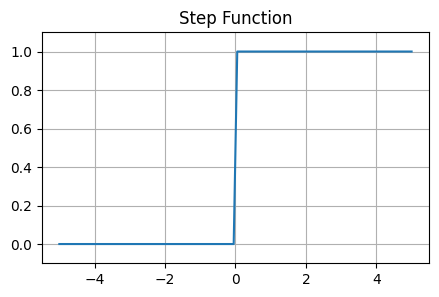

In [5]:
plt.figure(figsize=(5, 3))
plt.plot(X, step_function(X))
plt.title('Step Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수 (Sigmoid Function)

$ f(x) = \frac{1}{1 + e^{-x}} $

- 출력 범위: (0, 1)
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(Vanishing Gradient) 문제 발생 가능

In [6]:
def sigmoid(x):
    return 1 / ( 1+ np.exp(-x))

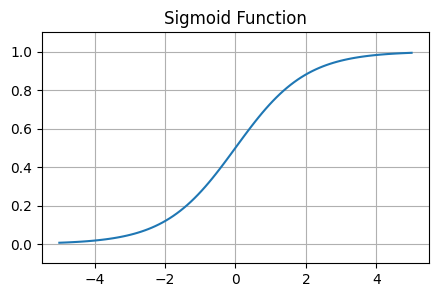

In [7]:
plt.figure(figsize=(5, 3))
plt.plot(X, sigmoid(X))
plt.title('Sigmoid Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 하이퍼볼릭 탄젠트 함수 (Hyperbolic Tangent, Tanh)

$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

- 출력 범위: (-1, 1)
- 시그모이드보다 중심이 0에 가까워 더 빠른 학습 진행 가능
- 기울기 소실 문제 발생 가능 

In [8]:
def tanh(x):
    # return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return np.tanh(x)

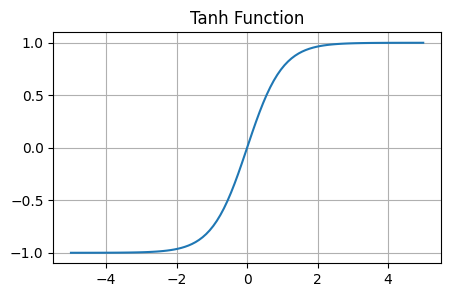

In [9]:
plt.figure(figsize=(5, 3))
plt.plot(X, tanh(X))
plt.title('Tanh Function')
plt.grid()
plt.show()

### ReLU

$ f(x) = \max(0, x) $

- 출력 범위: $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLU) 문제 발생 가능

In [10]:
def relu(x):
    return np.maximum(0, x)

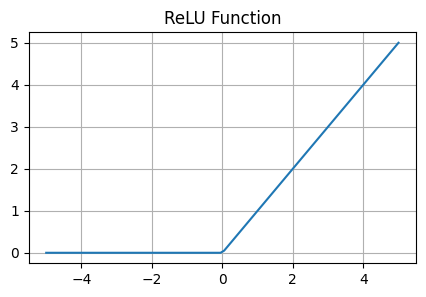

In [11]:
plt.figure(figsize=(5, 3))
plt.plot(X, relu(X))
plt.title('ReLU Function')
plt.grid()
plt.show()

### Leaky ReLU
$ f(x) = \begin{cases} x, & x \geq 0 \\ \alpha x, & x < 0\end{cases}$

- 출력 범위 : $(-\infty, \infty)$
- ReLU의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$를 적용 ($\alpha$는 일반적으로 0.01 사용)

In [13]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

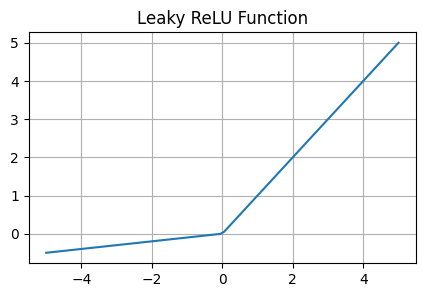

In [15]:
plt.figure(figsize=(5, 3))
plt.plot(X, leaky_relu(X, alpha=0.1))
plt.title('Leaky ReLU Function')
plt.grid()
plt.show()

In [16]:
import numpy as np
import pandas as pd

np.random.seed(0)
X = np.random.uniform(-5, 5, size=10)

df = pd.DataFrame({
    "input (x)": X,
    "Step function": step_function(X),
    "Sigmoid": sigmoid(X),
    "Tanh": tanh(X),
    "ReLU": relu(X),
    "Leaky ReLU": leaky_relu(X)
})
df

,input (x),Step function,Sigmoid,Tanh,ReLU,Leaky ReLU
0,0.488135,1,0.619667,0.452735,0.488135,0.488135
1,2.151894,1,0.895846,0.973326,2.151894,2.151894
2,1.027634,1,0.736457,0.772958,1.027634,1.027634
3,0.448832,1,0.610361,0.420938,0.448832,0.448832
4,-0.763452,0,0.317897,-0.643106,0.000000,-0.007635
5,1.458941,1,0.811371,0.897447,1.458941,1.458941
6,-0.624128,0,0.348843,-0.553996,0.000000,-0.006241
7,3.917730,1,0.980502,0.999209,3.917730,3.917730
8,4.636628,1,0.990403,0.999812,4.636628,4.636628
9,-1.165585,0,0.237654,-0.822852,0.000000,-0.011656


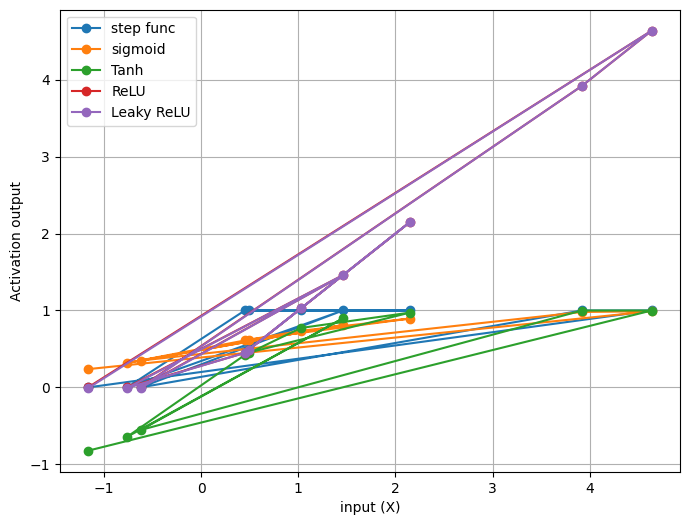

In [18]:
plt.figure(figsize=(8, 6))

plt.plot(df["input (x)"], df["Step function"], marker='o', label='step func')
plt.plot(df["input (x)"], df["Sigmoid"], marker='o', label='sigmoid')
plt.plot(df["input (x)"], df["Tanh"], marker='o', label='Tanh')
plt.plot(df["input (x)"], df["ReLU"], marker='o', label='ReLU')
plt.plot(df["input (x)"], df["Leaky ReLU"], marker='o', label='Leaky ReLU')

plt.xlabel('input (X)')
plt.ylabel('Activation output')
plt.legend()
plt.grid()
plt.show()